In [1]:
if "google.colab" in str(get_ipython()):
    !pip install PyCO2SYS

In [1]:
import os
from itertools import product
import numpy as np
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import PyCO2SYS as csys

import glodap

## Load the GLODAP dataset 

[GLODAP](https://www.glodap.info/) is a observational synthesis of biogeochemical variables over the global ocean.

The `glodap` module provides an interface to these data.

In [2]:
ds = glodap.open_glodap(product="GLODAPv2.2016b_MappedClimatologies")

# subset for surface
ds = ds.isel(depth=0, drop=True)
ds

<xarray.Dataset> Size: 8MB
Dimensions:       (lat: 180, lon: 360, bnds: 2)
Coordinates:
  * lon           (lon) float64 3kB 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * lat           (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Dimensions without coordinates: bnds
Data variables: (12/17)
    Cant          (lat, lon) float64 518kB ...
    NO3           (lat, lon) float64 518kB ...
    OmegaA        (lat, lon) float64 518kB ...
    OmegaC        (lat, lon) float64 518kB ...
    PI_TCO2       (lat, lon) float64 518kB ...
    PO4           (lat, lon) float64 518kB ...
    ...            ...
    SALT          (lat, lon) float64 518kB ...
    SiO3          (lat, lon) float64 518kB ...
    TEMP          (lat, lon) float64 518kB ...
    area          (lat, lon) float64 518kB 1.079e+08 1.079e+08 ... 1.079e+08
    depth_bnds    (bnds) float64 16B -5.0 5.0
    dz            float64 8B 10.0
Attributes:
    Description:          1 X 1 global mapped field of anthropogenic carbon c...
    Created:              Created by Siv K. Lauvset on 12-May-2016 18:48:16
    Institution name:     University of Bergen
    Contact information:  siv.lauvset@uib.no; are.olsen@uib.no
    Citation:             Cite as: Lauvset, Siv K., Key, Robert M., Olsen, Ar...

In [14]:
LAT = np.empty((ds.sizes["lat"], ds.sizes["lon"]))
for i in range(ds.sizes["lon"]):
    LAT[:, i] = ds.lat.values

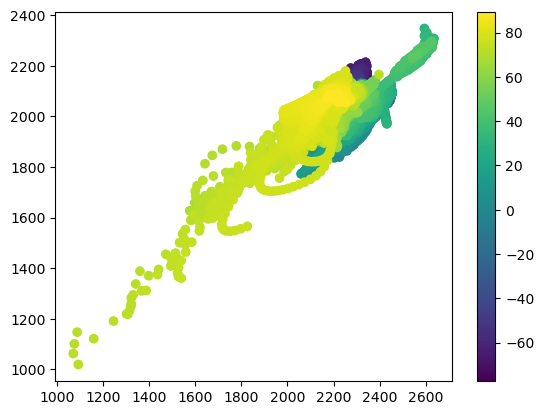

In [16]:
plt.scatter(ds.ALK.values.ravel(), ds.DIC.values.ravel(), c=LAT.ravel())
plt.colorbar()

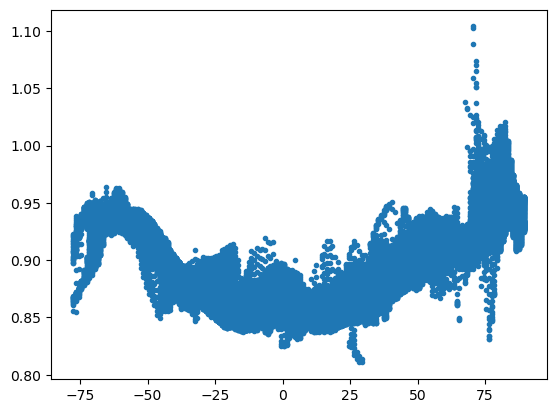

In [17]:
plt.plot(LAT.ravel(), ds.DIC.values.ravel() / ds.ALK.values.ravel(), ".")